In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split 
from sklearn.preprocessing import StandardScaler 
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston 
boston = load_boston()
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos['MEDV'] = boston.target

In [2]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
bos.describe().round(2 )

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


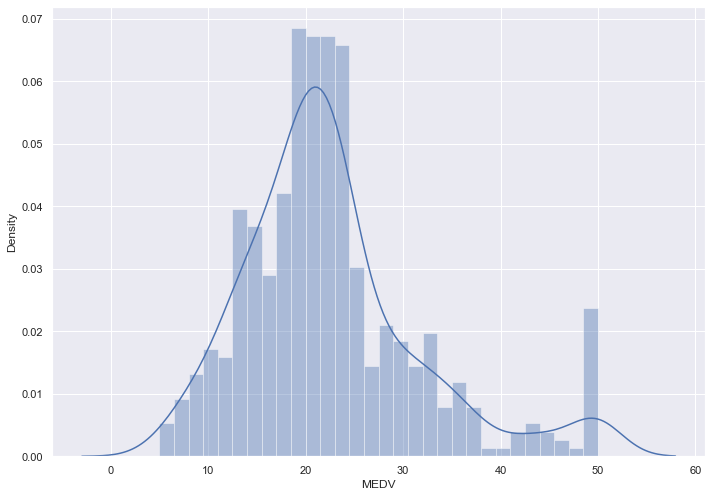

In [4]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(bos['MEDV'], bins=30)
plt.show()

<AxesSubplot:>

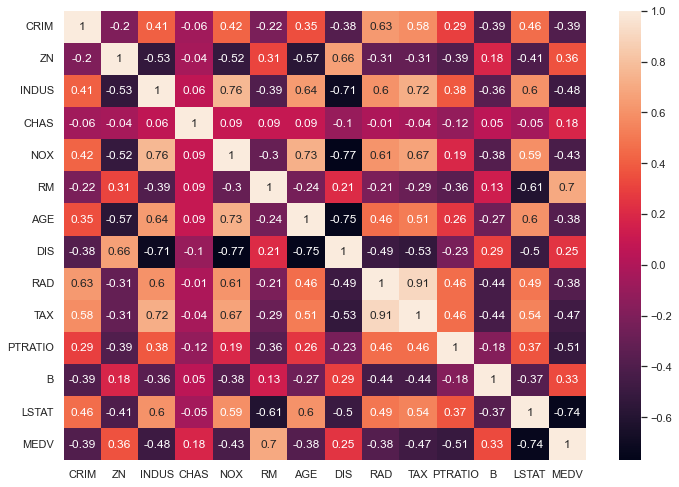

In [5]:
correlation_matrix = bos.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

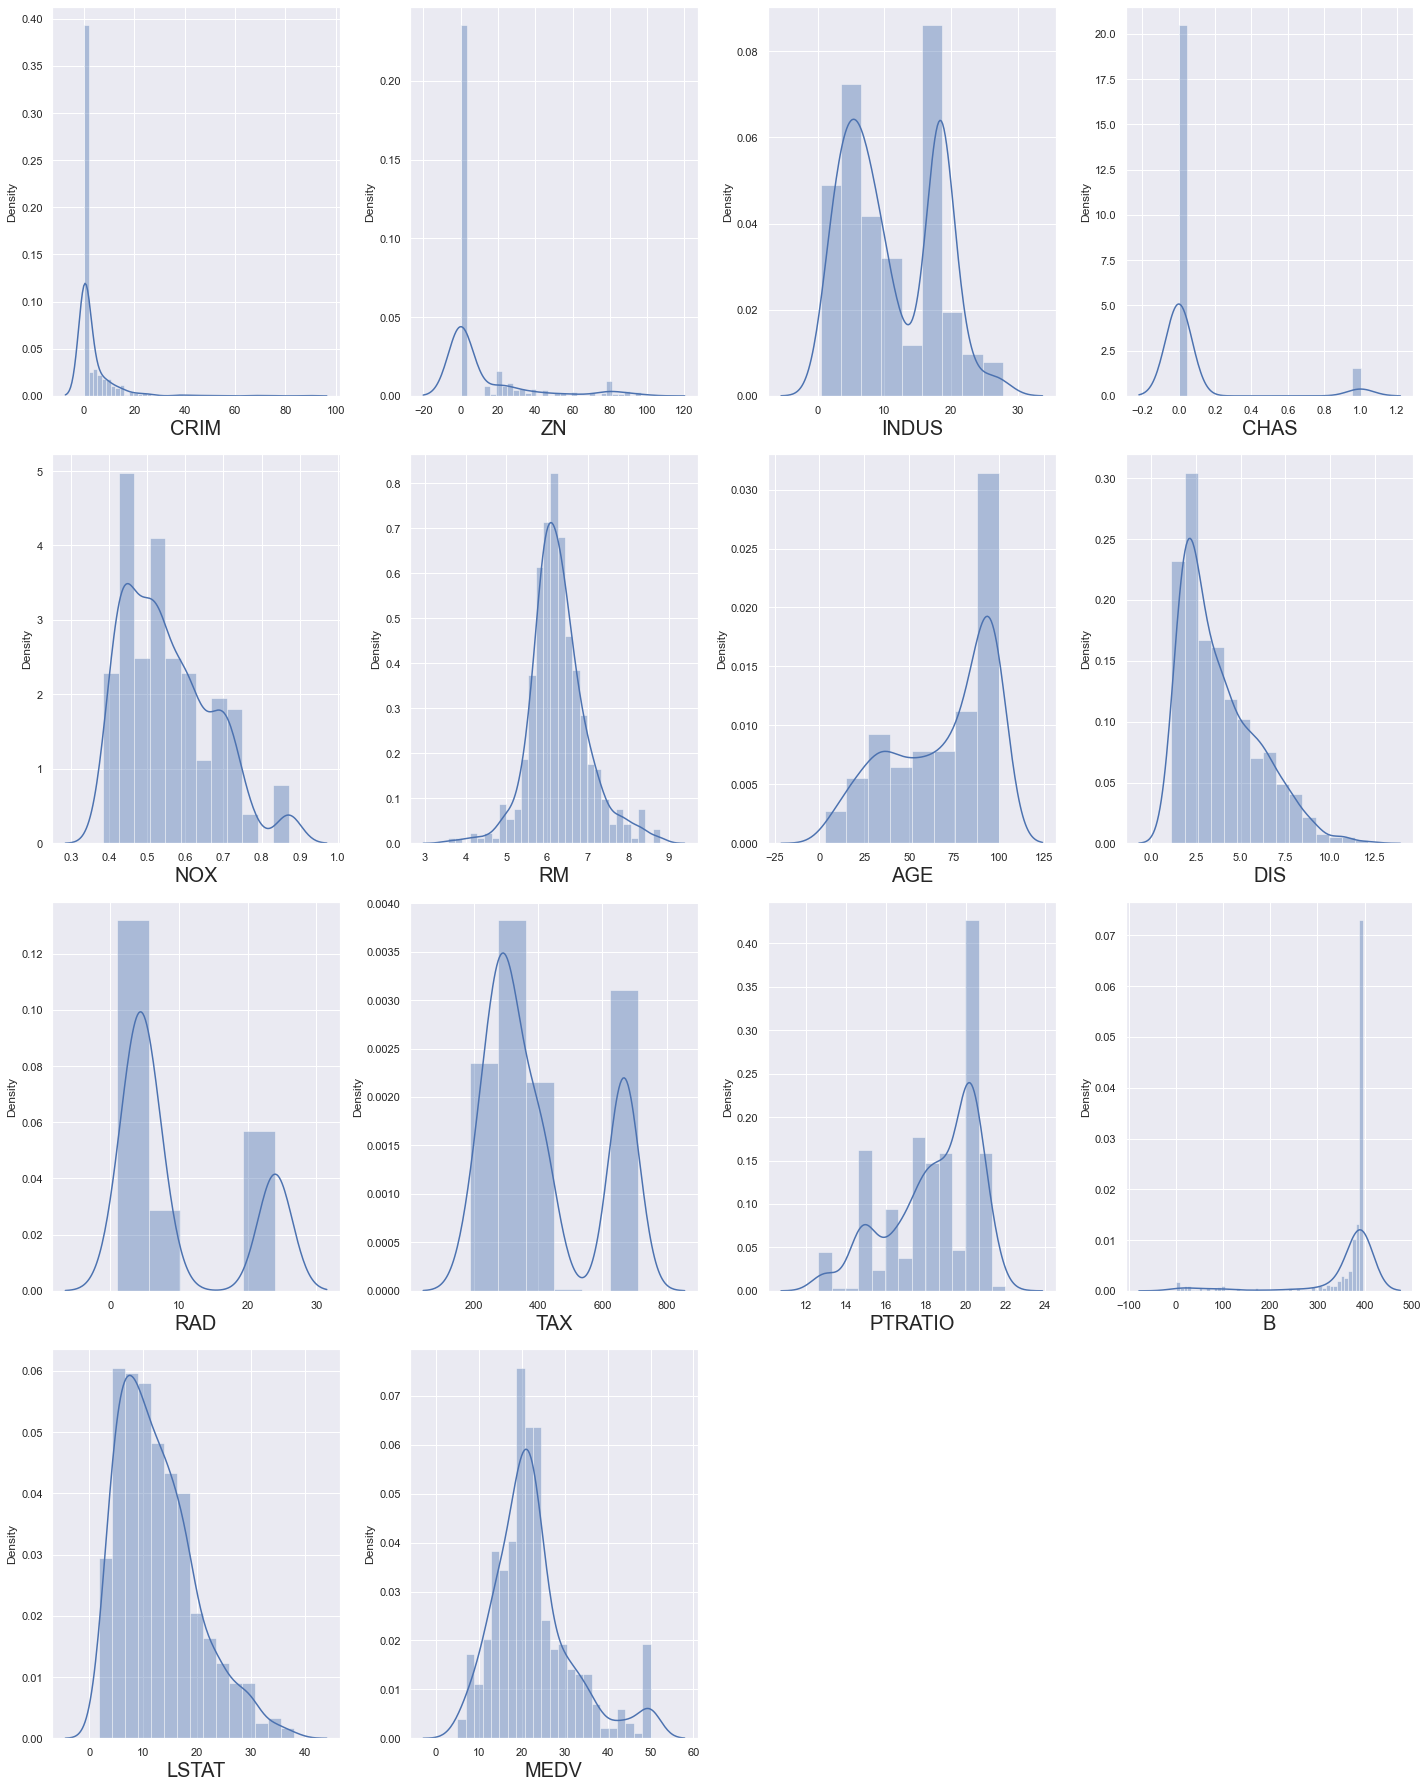

In [6]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bos:
    if plotnumber<=len(bos.columns) :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:>

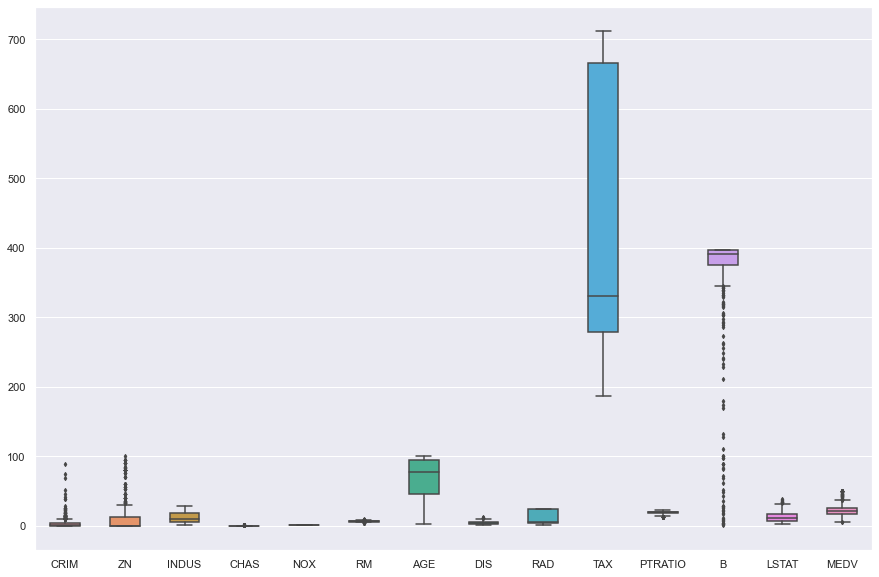

In [7]:
import seaborn as sns
import matplotlib.pyplot as py
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=bos, width= 0.5,ax=ax,  fliersize=3)

In [8]:
IQR = bos.CRIM.quantile(.75) - bos.CRIM.quantile(.25)
lower_bound = bos.CRIM.quantile(.25) - (IQR * 1.5)
upper_bound = bos.CRIM.quantile(.75) + (IQR * 1.5)
print(lower_bound) , print(upper_bound), print(bos.CRIM.mean())

-5.31051125
9.06963875
3.6135235573122535


(None, None, None)

In [9]:
bos.loc[bos['CRIM']>=9,'CRIM']=9

<AxesSubplot:xlabel='CRIM'>

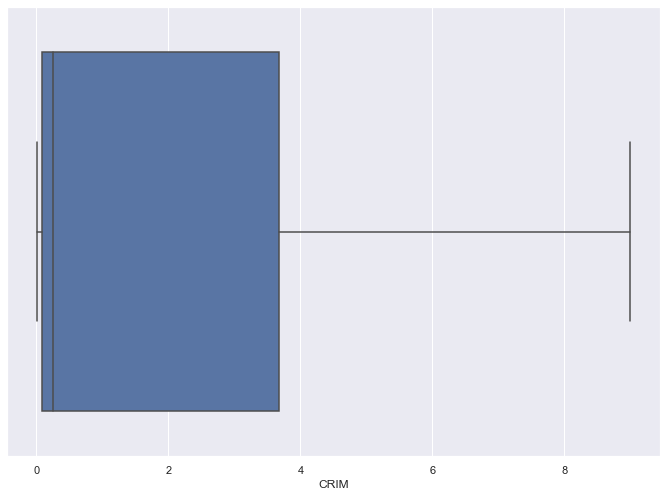

In [10]:
sns.boxplot(bos.CRIM)

In [11]:
IQR = bos.ZN.quantile(.75) - bos.ZN.quantile(.25)
lower_bound = bos.ZN.quantile(.25) - (IQR * 1.5)
upper_bound = bos.ZN.quantile(.75) + (IQR * 1.5)
print(lower_bound) , print(upper_bound), print(bos.ZN.mean())

-18.75
31.25
11.363636363636363


(None, None, None)

In [12]:
bos.loc[bos['ZN']>=31,'ZN']=31

<AxesSubplot:xlabel='ZN'>

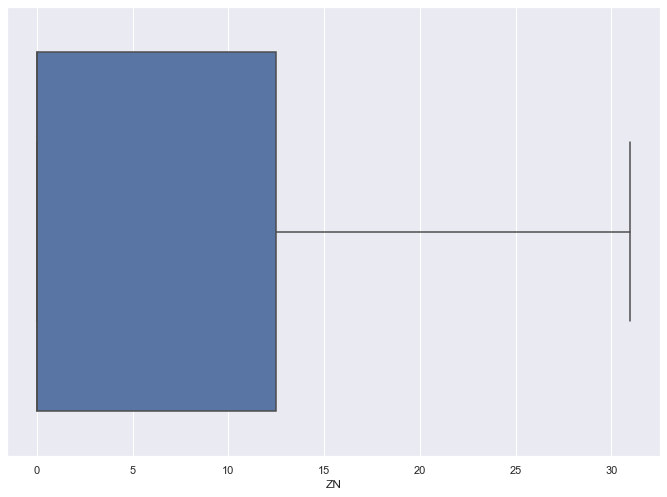

In [13]:
sns.boxplot(bos.ZN)

In [14]:
IQR = bos.B.quantile(.75) - bos.B.quantile(.25)
lower_bound = bos.B.quantile(.25) - (IQR * 1.5)
upper_bound = bos.B.quantile(.75) + (IQR * 1.5)
print(lower_bound) , print(upper_bound), print(bos.B.mean())

344.10624999999993
427.49625000000003
356.67403162055257


(None, None, None)

In [15]:
bos.loc[(bos['B']<=343) | (bos['B']>=426),'B']=343

<AxesSubplot:xlabel='B'>

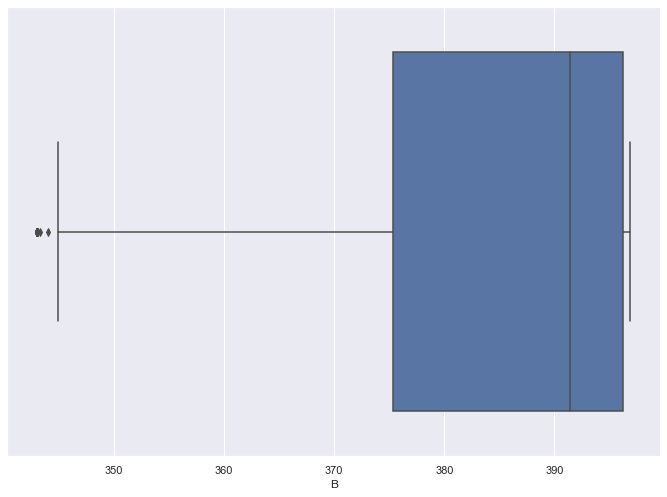

In [16]:
sns.boxplot(bos.B)

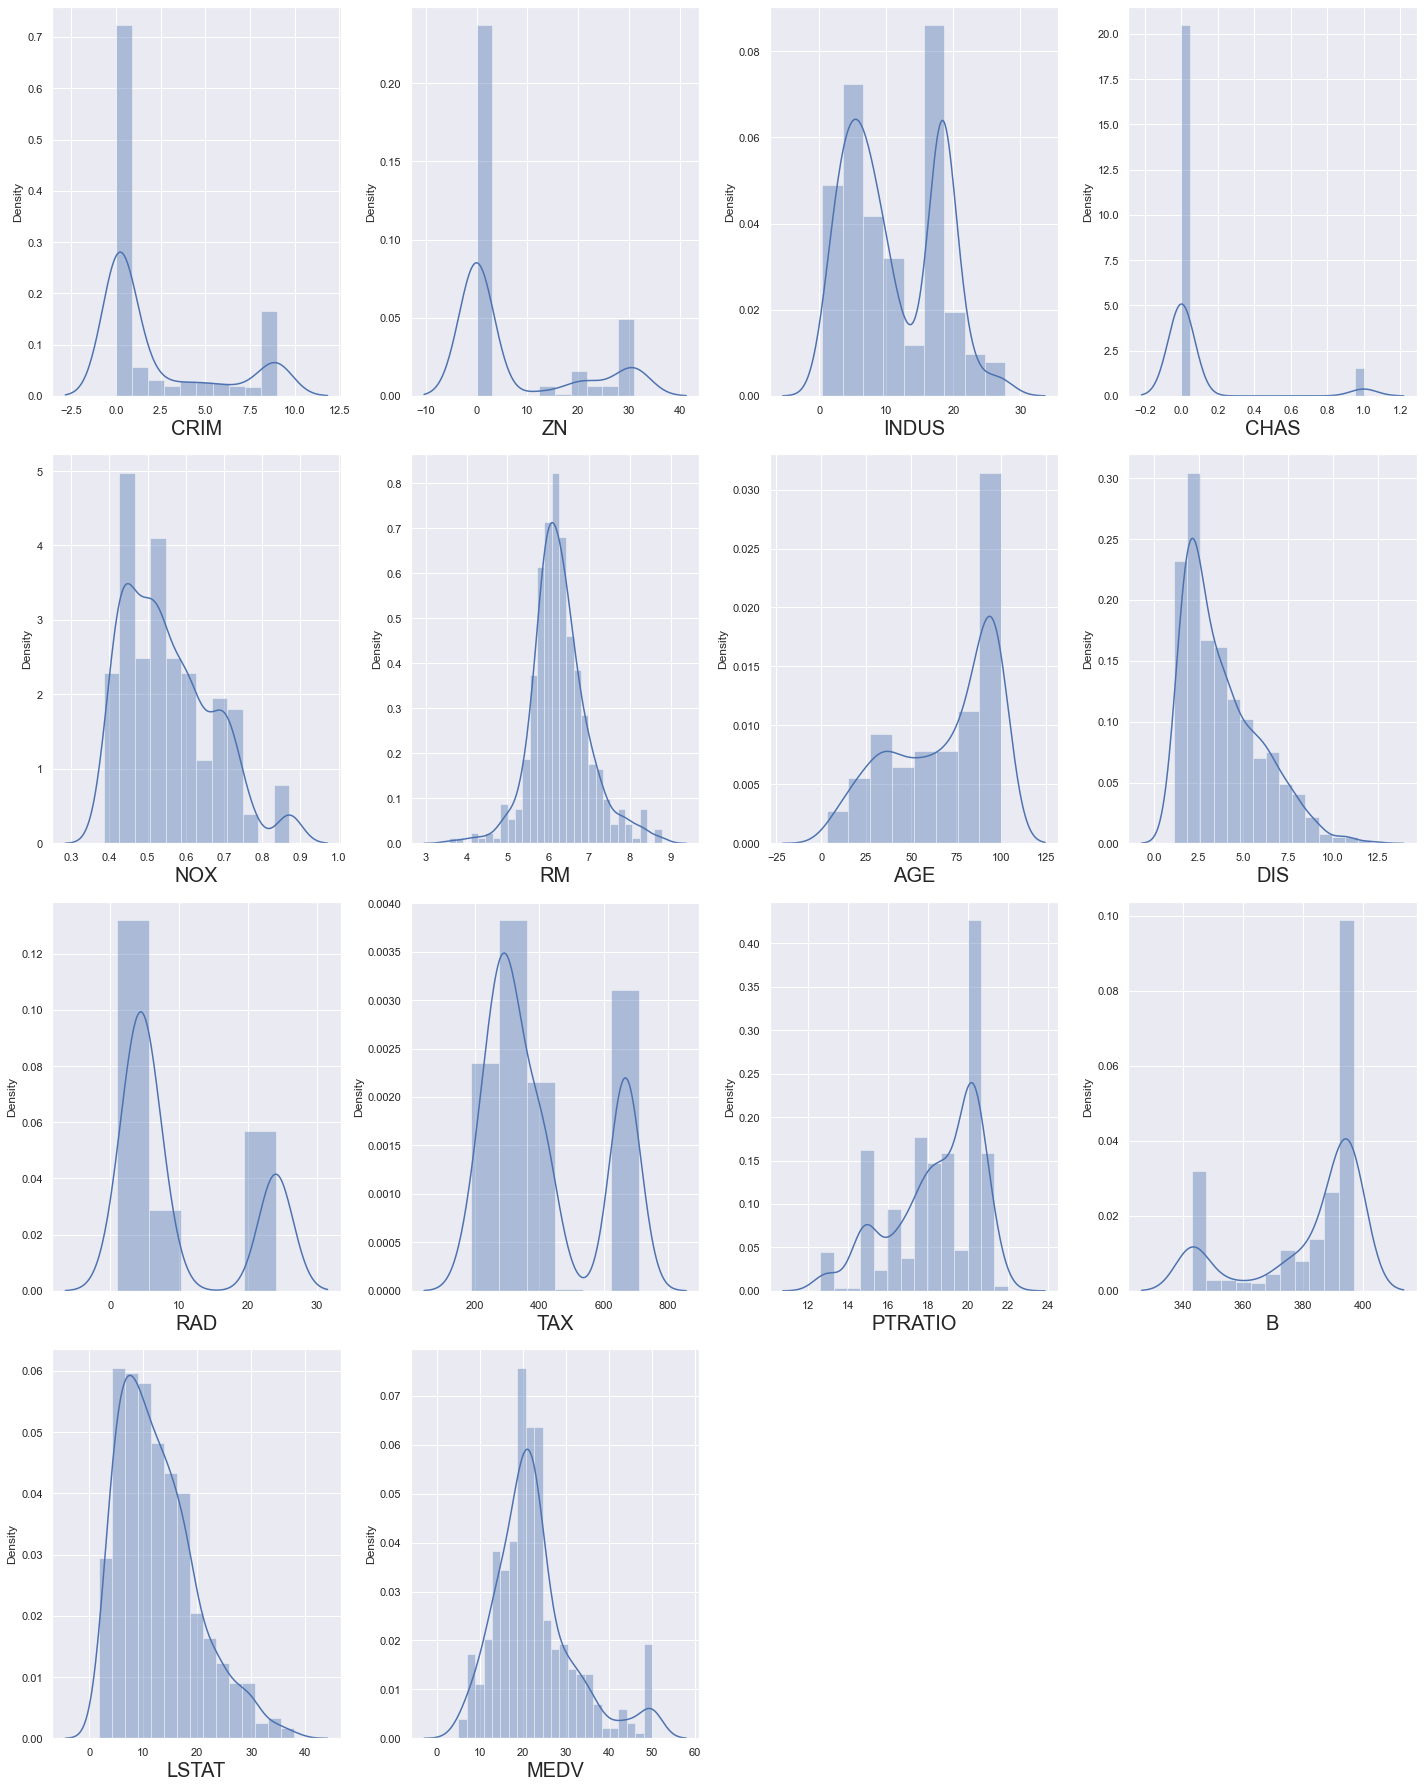

In [17]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bos:
    if plotnumber<=len(bos.columns) :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:>

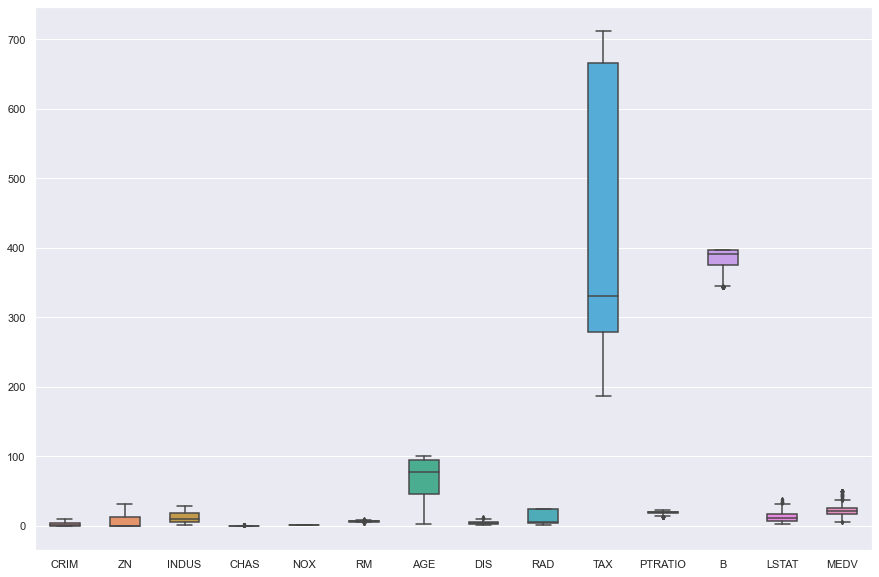

In [18]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=bos, width= 0.5,ax=ax,  fliersize=3)

In [23]:
# Create correlation matrix
corr_matrix = bos.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# Drop features 
bos.drop(to_drop, axis=1, inplace=True)

In [24]:
to_drop

['RAD', 'TAX']

In [25]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,21.0,393.45,6.48,22.0


In [26]:
X = bos.drop(['MEDV'],axis=1)
y = bos['MEDV']

In [33]:
# let's split the training set again into training and test dataset 
x_train,x_test,y_train,y_test =  train_test_split(X,y,test_size=0.2, random_state= 355)

In [36]:
from sklearn.ensemble import RandomForestRegressor
rnd = RandomForestRegressor()
rnd.fit(x_train,y_train)

RandomForestRegressor()

In [37]:
rnd.score(x_test,y_test)

0.8293128044740329

In [38]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115],
    'criterion': ['mse', 'mae'],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split': [4,5,6,7,8],
    'max_features' : ['auto','log2']
}

In [40]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rnd,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [41]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 5, 6, 7, 8],
                         'n_estimators': [90, 100, 115]},
             verbose=3)

In [42]:
grid_search.best_params_

{'criterion': 'mse',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 90}

In [43]:
rand = RandomForestRegressor( criterion='mse',max_features = 'auto',min_samples_leaf =1,min_samples_split= 4,n_estimators =90)

In [44]:
rand.fit(x_train,y_train)

RandomForestRegressor(min_samples_split=4, n_estimators=90)

In [45]:
rand.score(x_test,y_test)

0.8375741626499632

In [46]:
y_pred = rand.predict(x_test)

In [47]:
import pickle
# saving the model to the local file system
filename = 'rnd_model.pickle'
pickle.dump(rand, open(filename, 'wb'))

In [48]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT
448,9.00000,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,20.2,396.90,18.13
75,0.09512,0.0,12.83,0.0,0.437,6.286,45.0,4.5026,18.7,383.23,8.94
431,9.00000,0.0,18.10,0.0,0.584,6.833,94.3,2.0882,20.2,343.00,19.69
142,3.32105,0.0,19.58,1.0,0.871,5.403,100.0,1.3216,14.7,396.90,26.82
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,17.8,392.83,4.03
...,...,...,...,...,...,...,...,...,...,...,...
291,0.07886,31.0,4.95,0.0,0.411,7.148,27.7,5.1167,19.2,396.90,3.56
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,21.0,391.99,9.67
346,0.06162,0.0,4.39,0.0,0.442,5.898,52.3,8.0136,18.8,364.61,12.67
130,0.34006,0.0,21.89,0.0,0.624,6.458,98.9,2.1185,21.2,395.04,12.60


In [49]:
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict([[9.00000,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,20.2,396.90,18.13]])
a

array([14.22221032])